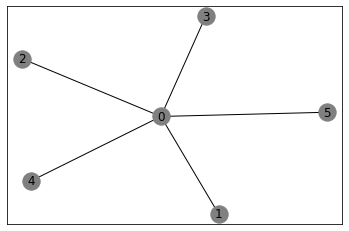

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
   

class GraphVisualization:

    def __init__(self):

        self.visual = []

    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)

    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G,node_color='grey')
        plt.show()


G = GraphVisualization()
G.addEdge(0, 1)
G.addEdge(0, 2)
G.addEdge(0, 3)
G.addEdge(0, 4)
G.addEdge(0, 5)

G.visualize()

In [1]:
import dgl
import numpy as np
import torch

#g = dgl.graph(([0,0,0,0,0],[1,2,3,4,5]))


Using backend: pytorch


In [2]:
# Assign a 3-dimensional node feature vector for each node.
g.ndata['name'] = torch.randn(6, 3)
# Assign a 4-dimensional edge feature vector for each edge.
g.edata['b'] = torch.randn(5, 4)
# Assign a 5x4 node feature matrix for each node.  Node and edge features in DGL can be multi-dimensional.
g.ndata['y'] = torch.randn(6, 5, 4)

print(g.ndata['name'])

NameError: name 'g' is not defined

In [22]:
print(g.num_nodes())
print(g.num_edges())

print(g.out_degrees(0))
print(g.in_degrees(0))

6
5
5
0


In [5]:
import dgl.data

dataset = dgl.data.CoraGraphDataset()
g = dataset[0]
g.ndata['label']

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


tensor([3, 4, 4,  ..., 3, 3, 3])

In [6]:
u, v = g.edges()
print("u, v ", u,v)
print("len(u), len(v) ", len(u),len(v))

u, v  tensor([   0,    0,    0,  ..., 2707, 2707, 2707]) tensor([ 633, 1862, 2582,  ...,  598, 1473, 2706])
len(u), len(v)  10556 10556


In [41]:
from dgl.nn import GraphConv

class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

# Create the model with given dimensions
model = GCN(g.ndata['feat'].shape[1], 16, dataset.num_classes)

In [44]:
def train(g, model):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    best_val_acc = 0
    best_test_acc = 0

    features = g.ndata['feat']
    print('Features',features)
    print('Features.shape',features.shape)
    labels = g.ndata['label']
    print('Labels',labels)
    train_mask = g.ndata['train_mask']
    print('Train Mask',train_mask)
    print('len(Train Mask)',len(train_mask))
    val_mask = g.ndata['val_mask']
    test_mask = g.ndata['test_mask']
    
    for e in range(100):
    # Forward
        logits = model(g, features)
#         print('Logits.shape', logits.shape)
#         print('Logits', logits)

        # Compute prediction
        pred = logits.argmax(1)
#         print('Pred', pred)
#         print('len(Pred)', len(pred))

        # Compute loss
        # Note that you should only compute the losses of the nodes in the training set.
        loss = F.cross_entropy(logits[train_mask], labels[train_mask])

        # Compute accuracy on training/validation/test
        train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
#         print('pred[train_mast] == labels[train_mask]',(pred[train_mask]==labels[train_mask]).float().mean())
#         print('len(pred[train_mast])',len(pred[train_mask]))
        val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
        test_acc = (pred[test_mask] == labels[test_mask]).float().mean()

        # Save the best validation accuracy and the corresponding test accuracy.
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if e % 5 == 0:
            print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f}), test acc: {:.3f} (best {:.3f})'.format(
                e, loss, val_acc, best_val_acc, test_acc, best_test_acc))
            
            
model = GCN(g.ndata['feat'].shape[1], 16, dataset.num_classes)
train(g, model)

Features tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Features.shape torch.Size([2708, 1433])
Labels tensor([3, 4, 4,  ..., 3, 3, 3])
Train Mask tensor([ True,  True,  True,  ..., False, False, False])
len(Train Mask) 2708
In epoch 0, loss: 1.946, val acc: 0.088 (best 0.088), test acc: 0.076 (best 0.076)
In epoch 5, loss: 1.900, val acc: 0.454 (best 0.472), test acc: 0.491 (best 0.519)
In epoch 10, loss: 1.824, val acc: 0.524 (best 0.524), test acc: 0.581 (best 0.581)
In epoch 15, loss: 1.724, val acc: 0.550 (best 0.550), test acc: 0.602 (best 0.602)
In epoch 20, loss: 1.597, val acc: 0.586 (best 0.586), test acc: 0.626 (best 0.626)
In epoch 25, loss: 1.448, val acc: 0.648 (best 0.648), test acc: 0.676 (best 0.676)
In epoch 30, loss: 1.281, val acc: 0.680 (best 0.680), test acc: 0

In [36]:
(torch.LongTensor(([0,1,0,1]) == torch.LongTensor([0,0,1,1]))).float()

TypeError: new(): data must be a sequence (got bool)